In [14]:
# In a Colab cell
!git clone https://github.com/VanshikaKumawat/BlockChain-data-analysis.git
%cd BlockChain-data-analysis



Cloning into 'BlockChain-data-analysis'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 66 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 931.04 KiB | 3.46 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/BlockChain-data-analysis/BlockChain-data-analysis


In [28]:
# 01_data_collection.ipynb

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Define paths to raw and processed data directories
RAW_DATA_DIR = '../data/raw/'
PROCESSED_DATA_DIR = '../data/processed/'

# Load the dataset from raw folder
data_file = 'transaction_dataset.csv'  # Replace with your actual filename
dataset_path = os.path.join(RAW_DATA_DIR, data_file)

In [29]:
df = pd.read_csv(dataset_path)

# Display dataset dimensions and preview first few rows
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()


Dataset contains 9841 rows and 51 columns.


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [30]:
# Show detailed information about columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [31]:
# Check for missing values in each column
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Unnamed: 0                                                 0
Index                                                      0
Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                             

In [32]:
# Show the distribution of the target label 'FLAG' indicating fraud status
label_col = 'FLAG'  # Adjust if label column name differs
label_counts = df[label_col].value_counts()
print(f"Label distribution:\n{label_counts}\n")

# Calculate and display percentage of each class
total_samples = df.shape[0]
fraud_pct = (label_counts.get(1, 0) / total_samples) * 100
normal_pct = (label_counts.get(0, 0) / total_samples) * 100
print(f"Fraudulent wallets: {fraud_pct:.2f}%")
print(f"Normal wallets: {normal_pct:.2f}%")

Label distribution:
FLAG
0    7662
1    2179
Name: count, dtype: int64

Fraudulent wallets: 22.14%
Normal wallets: 77.86%


In [33]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

# Handle missing data by dropping rows with null values (alternative methods can be used)
df.dropna(inplace=True)

In [34]:
# Save the cleaned dataset into the processed data folder
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
cleaned_file = 'cleaned_transaction_dataset.csv'
df.to_csv(os.path.join(PROCESSED_DATA_DIR, cleaned_file), index=False)

print(f"Cleaned data saved to '{PROCESSED_DATA_DIR}{cleaned_file}'")

Cleaned data saved to '../data/processed/cleaned_transaction_dataset.csv'


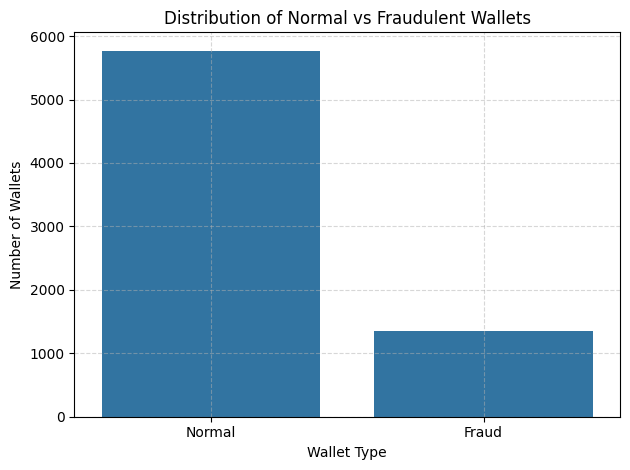

In [35]:
# Visualize the label distribution with a bar plot
sns.countplot(data=df, x=label_col)
plt.title("Distribution of Normal vs Fraudulent Wallets")
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel("Wallet Type")
plt.ylabel("Number of Wallets")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
